# Tobig's 21기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크다운 또는 주석으로 설명해주세요

## 데이터

In [41]:
import pandas as pd
import numpy as np
import random

In [42]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [47]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [48]:
# parameter 개수
N = len(X_train.loc[0])

In [49]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.80505201, 0.86992244, 0.66161757])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = "..."$

In [50]:
def dot_product(X, parameters):
    z=np.dot(X,parameters)
    return z

## Logistic Function

## $p = "..."$

In [51]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p= 1/(1+np.exp(-z))
    return p

In [52]:
logistic(X_train.iloc[1], parameters)

0.8659352608886438

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$. 1/2 은 계산상의 편의를 위해 곱합니다
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 sum 형태까지만 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = "..."$

In [53]:
def minus_log_cross_entropy_i(X, y, parameters):
    loss = -y * np.log(logistic(X, parameters)) - (1 - y) * np.log(1 - logistic(X, parameters))

    return loss

In [54]:
def mse_i(X, y, parameters):
    loss = (y - dot_product(X, parameters))**2
    loss /= 2 # 계산의 편의를 위해 2로 나눠줌.
    return loss

In [55]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n: 현재 배치의 데이터 수
    loss = 0
    for i in range(len(X_set)):  # 반복문에서 인덱스 오류 수정(X_set이 batch_size보다 작은 경우, 즉 마지막 배치)
        loss += loss_function(X_set.iloc[i], y_set.iloc[i], parameters)  # sum of the loss from batch samples

    loss /= n #loss 평균값으로 계산
    return loss

In [56]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

1.8089486656401184

In [57]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.4459131737114932

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)="..."$
## ${\partial\over{\partial \theta_j}}l(p)="..."$

In [58]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        gradient = - (y - dot_product(X, parameters))*X[j]
    elif model == 'logistic':
        gradient = - (y - logistic(X, parameters))*X[j]
    return gradient

In [59]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

-0.1480495902326158

In [60]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.08402281640726615

In [61]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [62]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]

    for j in range(len(parameters)):
      for i in range(len(X_set)):
          x_i = X_set.iloc[i]
          y_i = y_set.iloc[i]

          gradients[j] += get_gradient_ij(x_i, y_i, parameters, j, model)

    return gradients

In [63]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

[78.75780139722012, 186.07762081045095, 210.15839560515505]

In [64]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[52.98143100841533, 17.699393693140742, 47.33256304033073]

## mini-batch
인덱스로 미니 배치 나누기

In [65]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명:
batch_idx 함수는 미니 배치 경사 하강법에서 전체 데이터셋을 여러 작은 배치로 분할하는 역할을 합니다. batch_size는 한 번에 처리할 데이터의 수를 정의하며, 이를 통해 batch_idx 함수는 고유한 인덱스를 가진 배치를 생성합니다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [66]:
def step(parameters, gradients, learning_rate, n): #n: 현재 배치의 데이터 수
    for j in range(len(parameters)):
        parameters[j] -= (learning_rate * gradients[j] / n)
    return parameters

In [67]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.80151991, 0.86874248, 0.65846206])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률은 매 반복에서 경사하강법의 단계 크기를 결정합니다.
- tolerance: 경사하강법이 더 이상 의미있게 학습되지 않을 때 (즉, 업데이트의 크기가 tolerance보다 작을 때) 학습을 중단하는 기준입니다.
- batch: 학습 데이터의 부분 집합입니다.
- epoch: 전체 학습 데이터가 알고리즘에 한 번 통과하는 것을 의미합니다.
- num_epoch: 전체 데이터 세트에 대해 학습을 반복할 횟수입니다.

---
**경사하강법은 크게 세 가지 유형**
- BGD (Batch Gradient Descent): 전체 데이터 세트를 사용하여 각 단계에서 경사를 계산합니다.
- SGD (Stochastic Gradient Descent): 각 단계에서 하나의 훈련 예제를 무작위로 선택하여 경사를 계산합니다.
- MGD (Mini-batch Gradient Descent): 각 단계에서 mini-batch라고 하는 작은 데이터 세트의 샘플을 사용하여 경사를 계산합니다.



---
**batch_size에 따른 경사하강법의 종류**
- batch_size=1 -> SGD (Stochastic Gradient Descent)
- batch_size=k (1<k<whole) -> MGD (Mini-batch Gradient Descent)
- batch_size=whole -> BGD (Batch Gradient Descent)

In [68]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)

    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, batch_size)
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, batch_size)

            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss

        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")

    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수를 찾아보세요. 학습을 진행할 때, hyperparameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

default: learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16

In [69]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.9223133535103311  params: [0.65933879 0.72445714 0.18881593]  gradients: [54.17593012674737, 8.715428463920215, 36.504761994816256]
epoch: 100  loss: 0.4377355397217882  params: [-0.80941188  1.01767172 -0.92900254]  gradients: [6.651865307786219, -8.17517218271394, 8.824078416378061]
epoch: 200  loss: 0.38409555369906373  params: [-1.04984508  1.49799977 -1.41190291]  gradients: [2.07978487120826, -6.2287890044858, 6.089691052283283]
epoch: 300  loss: 0.35708237065789183  params: [-1.15711277  1.86045911 -1.76448764]  gradients: [1.3161292536615838, -4.764552995386633, 4.616222842052222]
epoch: 400  loss: 0.34087164592536895  params: [-1.23478502  2.14344485 -2.03784506]  gradients: [1.0465582393662423, -3.7972252348197135, 3.657058343909982]
epoch: 500  loss: 0.33029582116787937  params: [-1.29867196  2.37266083 -2.25803635]  gradients: [0.8810794225465879, -3.123339044463496, 2.9927776984756385]
epoch: 600  loss: 0.32299424695970425  params: [-1.35305884  2.5634626

array([-1.5090785 ,  3.09385297, -2.9434633 ])

In [70]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 0.30314632016270626  params: [-0.83962867  0.9450751  -1.07969561]  gradients: [0.2615089676633068, 0.1423134303273538, 0.18399528854285285]
epoch: 100  loss: 0.07837838042827626  params: [-1.93032499  4.1750175  -4.06768931]  gradients: [0.0753854956862801, 0.04102485885629454, 0.05304053683008487]
epoch: 200  loss: 0.07837416196234327  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.07538159522326551, 0.041022736220591334, 0.05303779250041911]
epoch: 300  loss: 0.07837416161020484  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.07538159489767184, 0.041022736043402945, 0.053037792271334414]
epoch: 400  loss: 0.07837416161017663  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.0753815948976457, 0.04102273604338872, 0.053037792271316025]
epoch: 500  loss: 0.07837416161017663  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.0753815948976457, 0.04102273604338872, 0.053037792271316025]
epoch: 600  loss: 0.0783741616101766

array([-1.9303681 ,  4.17514311, -4.06780375])

In [71]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

epoch: 0  loss: 0.4563867202767936  params: [0.45681658 0.53093104 0.11809745]  gradients: [3.4016336376463854, 3.0969291623239315, 3.941800577628525]


array([-0.27132069,  0.5910694 , -0.3496032 ])

### Predict Label

In [72]:
# bgd 활용하여 학습한 parameters로 예측
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)

# 초기에 설정한 random parameters로 예측
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [73]:
from sklearn.metrics import *

In [74]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [75]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [76]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [77]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [78]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.4437913 , 2.60199802])

In [79]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.2453526947105779  params: [1.2498053  0.81277499]  gradients: [-5.513425334037105, -3.986519548812989]
epoch: 100  loss: 0.1274188171790065  params: [0.48079194 2.60469446]  gradients: [-2.0363673057688763, -1.2177587150768625]
epoch: 200  loss: 0.12740554659103026  params: [0.47685329 2.61136334]  gradients: [-2.030282320714302, -1.2124855632555032]
epoch: 300  loss: 0.12740549489556935  params: [0.47683751 2.61139005]  gradients: [-2.030257948008955, -1.2124644422544755]
epoch: 400  loss: 0.12740549468853263  params: [0.47683745 2.61139016]  gradients: [-2.030257850386901, -1.2124643576567464]
epoch: 500  loss: 0.1274054946877033  params: [0.47683745 2.61139016]  gradients: [-2.030257849995886, -1.2124643573178993]
epoch: 600  loss: 0.12740549468770002  params: [0.47683745 2.61139016]  gradients: [-2.0302578499943174, -1.2124643573165401]
epoch: 700  loss: 0.12740549468770002  params: [0.47683745 2.61139016]  gradients: [-2.0302578499943165, -1.212464357316539]
epoc

array([0.47683745, 2.61139016])

In [80]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

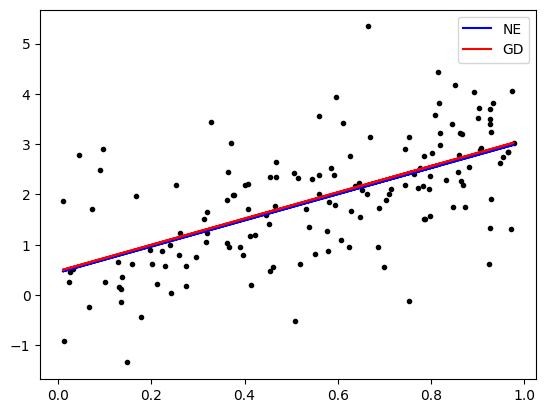

In [81]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()